# **AP155 Lab Assignment** 
## Module 6: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 and 2 are worth 50 points each).

_Due Date_: **5PM of December 21 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: \
_Student No._:\
_Section_:

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (50 pts.; 50/50 for code & discussion) 
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(15 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(10 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(15 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text. 

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(10 pts.)*

In [159]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp

In [194]:
m = 9.109e-31
M = m
L = 1e-8
x_0 = L/2
sigma = 1e-10
kappa = 5e10
hbar = 1.05457182e-34
h = 1e-18
N = 1000
a = L/N

In [228]:
from numpy import copy

def banded(Aa,va,up,down):

    # Copy the inputs and determine the size of the system
    A = copy(Aa)
    v = copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v

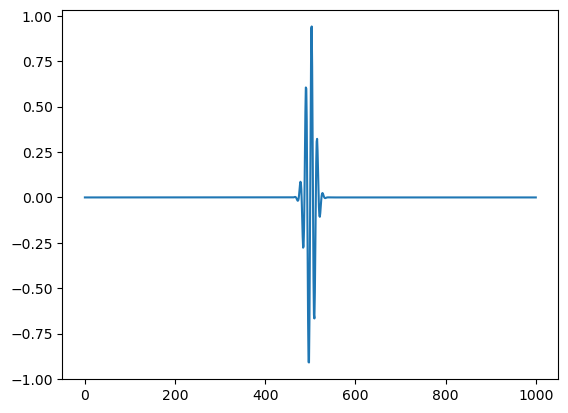

In [323]:
# initial wavefunction

def psi0(x):
    return exp(-((x-x_0)**2)/(2*sigma**2))*exp(1j*kappa*x)

x_vals = np.linspace(0,L,N+1)
psi0_vals = np.zeros(N+1,complex)

i = 0
for x in x_vals:
    psi0_vals[i] = psi0(x)
    i += 1

plt.plot(psi0_vals)

In [324]:
# formula for the elements of the tridiagonal matrices
a1 = 1 + h*1j*hbar/(2*m*a**2)
a2 = -h*1j*hbar/(4*m*a**2)
b1 = 1 - h*1j*hbar/(2*m*a**2)
b2 = h*1j*hbar/(4*m*a**2)

In [325]:
A = np.zeros((3,N+1),complex)
A[0,:N] = a2
A[1,:N] = a1
A[2,:N] = a2

In [330]:
vi = np.zeros(N+1, complex)

i = 1
for j in range(1,N):
    vi[i] = b1*psi0_vals[i] + b2*(psi0_vals[i+1] + psi0_vals[i-1])
    i += 1

1000

In [318]:
psi = banded(A, vi, 1, 1)

len(psi)

1000

### PROBLEM 2 (50 pts.; 50/50 for code & discussion)

**The Schrodinger equation and the spectral method**

_Refer to Exercise 9.9 in the Newman text._ In this problem, you will use the spectral method to solve the time-dependent Schodinger equation for the same system as in Problem 1, a single particle in one dimension in a box of length $L$ with impenetrable walls. 

To perform the fast transforms needed for this problem, you can use the scipy $\tt fftpack$ package's discrete sine transform $\tt dst$ ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.dst.html)) and inverse discrete sine transform $\tt idst$ ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.idst.html)). Alternatively, you can use the corresponding functions in the $\tt dcst$ package in Appendix E of the Newman text. 

1. Calculate the values of the coefficients $b_k$ which for convenience can be broken down into their real and imaginary parts as $b_k = \alpha_k + i \eta_k$· Divide the box into $N = 1000$ slices and create two arrays containing the real and imaginary parts of $\psi(x_n,0)$ at each grid point. Perform discrete sine transforms on each array separately and hence calculate the values of the $\alpha_k$ and $\eta_k$ for all $k=1$...$N-1$. *(15 pts.)*

2. Putting $b_k = \alpha_k +i \eta_k$ in the solution above and taking the real part we get $ {\rm Re}\ \psi(x_n, t) $ equals
$$\frac{1}{N} \sum_{k=1}^{N-1} \left[\alpha_k \cos\left(\frac{\pi^2\hbar k^2}{2ML^2}t\right) - \eta_k \sin\left(\frac{\pi^2\hbar k^2}{2ML^2}t\right)\right]\sin\left(\frac{\pi kn}{N}\right)$$
for the real part of the wavefunction. This is an inverse sine transform with coefficients equal to the quantities in the square brackets. 

   Calculate the real part of the wavefunction $\psi(x,t)$ at an arbitrary time $t$ using this formula and the inverse discrete sine transform function. *(10 pts.)* 
   
3. Test your program by making a graph of the wavefunction at time $t = 10^{-16}$ s. *(10 pts.)*

4. Make an animation of the wavefunction over time, similar to that described in part (4) of Problem 1 above. A suitable time interval for each frame of the animation is about $10^{-18}$ s. Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(15 pts.)*
